In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('Adobe_new.csv', encoding='latin-1')

In [ ]:
df.info()

In [ ]:
df1 = df1.rename(columns=lambda x: x.replace(' ', ''))
df1 = df1.rename(columns=lambda x: x.lower())
df2 = df2.rename(columns=lambda x: x.replace(' ', ''))
df2 = df2.rename(columns=lambda x: x.lower())

In [ ]:
df = pd.merge(df, df3, on=['growthrate'], how='inner')

In [ ]:
df = pd.merge(df, df1, on=['dealband'], how='inner')

In [ ]:
df = pd.merge(df, df2, on=['industry'], how='inner')

In [ ]:
df['growthrate'] = df['growthrate'].replace('%','')

In [ ]:
def substatus_cat(x):
    if x == '100% Perpetual':
        return 0
    elif x == 'Partially Migrated':
        return 1
    else:
        return 2
df['substatus_cat'] = df['substatus'].apply(substatus_cat)

In [ ]:
pd.value_counts(df.new_seat_bands)

In [ ]:
table1 = pd.pivot_table(df, index = ['new_seat_bands'], 
                       values = ['calcseats'], aggfunc ={'calcseats':min})
table1


In [ ]:
table1 = pd.pivot_table(df, index = ['new_seat_bands'], 
                       values = ['calcseats'], aggfunc ={'calcseats':max})
table1


In [ ]:
df.to_csv('Adobe_new.csv')

In [2]:
df = pd.read_csv('Adobe_new.csv')

C:\Users\robert.lowe\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,5,11,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[df['industry'] != 'TBD']

In [4]:
df_Scores = df[['dealband_cat', 'substatus_cat', 'industry_cat']]

In [5]:
import numpy as np
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_Scores) 
    kmeanModel.fit(df_Scores)     
      
    distortions.append(sum(np.min(cdist(df_Scores, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_Scores.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_Scores, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_Scores.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

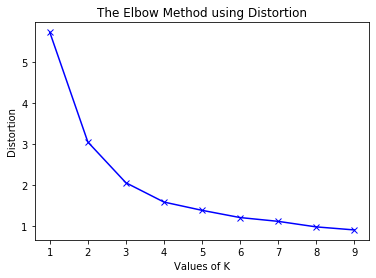

In [6]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_Scores)
    wcss.append(kmeans.inertia_)

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(df_Scores)
df['clusters'] = clusters
#df.head()

In [9]:

def un(x):
    return x.nunique()
table1 = pd.pivot_table(df, index = ['dealband_cat', 'industry_cat'], columns = ['substatus_cat'],
                       values = ['parentaccounts'], aggfunc ={'parentaccounts':un})


In [10]:
table1

parentaccounts           
substatus_cat                          0      1   2
dealband_cat industry_cat                          
1            2                   10837.0  204.0 NaN
             3                    6360.0  224.0 NaN
             4                    4758.0   71.0 NaN
             5                    3329.0   40.0 NaN
             6                    2431.0  108.0 NaN
             7                    2687.0   87.0 NaN
             8                    2130.0   22.0 NaN
             9                    1946.0   50.0 NaN
             10                   2157.0   57.0 NaN
             11                   2140.0   30.0 NaN
             12                   1954.0   44.0 NaN
             13                   1732.0   68.0 NaN
             14                   1618.0   81.0 NaN
             15                   1804.0   38.0 NaN
             16                   1214.0    6.0 NaN
             17                   1038.0   21.0 NaN
             18                    737.0   23.0 NaN
             19                    655.0   16.0 NaN
             20                    686.0   21.0 NaN
             21                    557.0   16.0 NaN
             22                    594.0   10.0 NaN
             23                    536.0   16.0 NaN
             24                    695.0   14.0 NaN
             25                    274.0    2.0 NaN
             26                    198.0   25.0 NaN
             27                    205.0    8.0 NaN
             28                    180.0    5.0 NaN
             29                    238.0   10.0 NaN
             30                     39.0    3.0 NaN
             31                     27.0    2.0 NaN
...                                  ...    ...  ..
4            2                      73.0   54.0 NaN
             3                      47.0   32.0 NaN
             4                       9.0   19.0 NaN
             5                      16.0   24.0 NaN
             6                      23.0   36.0 NaN
             7                      49.0   13.0 NaN
             8                     151.0   40.0 NaN
             9                       7.0   15.0 NaN
             10                     18.0    4.0 NaN
             11                     13.0   12.0 NaN
             12                     11.0    3.0 NaN
             13                      8.0   11.0 NaN
             14                     37.0   17.0 NaN
             15                     10.0    3.0 NaN
             16                      4.0    9.0 NaN
             17                      9.0    7.0 NaN
             18                      5.0   15.0 NaN
             19                     14.0   21.0 NaN
             20                      8.0   12.0 NaN
             21                     19.0   17.0 NaN
             22                     36.0   15.0 NaN
             23                     28.0   16.0 NaN
             24                      2.0    2.0 NaN
             25                     15.0   14.0 NaN
             26                     60.0   19.0 NaN
             27                      3.0    8.0 NaN
             28                      4.0   10.0 NaN
             29                      1.0    2.0 NaN
             30                      2.0    5.0 NaN
             31                      4.0    NaN NaN

[120 rows x 3 columns]

In [11]:
def un(x):
    return x.nunique()
table2 = pd.pivot_table(df, index = ['clusters'],
                       values = ['parentaccounts'], aggfunc ={'parentaccounts':un})
table2

,parentaccounts
clusters,
0,32745
1,7950
2,18372


In [12]:
table1 = pd.pivot_table(df, index = ['dealband_cat', 'industry_cat'], columns = ['substatus_cat'],
                       values = ['parentaccounts', 'clusters'], aggfunc ={'parentaccounts':un, 'clusters':min})
#table1

Text(0.5, 0, 'substatus_cat')

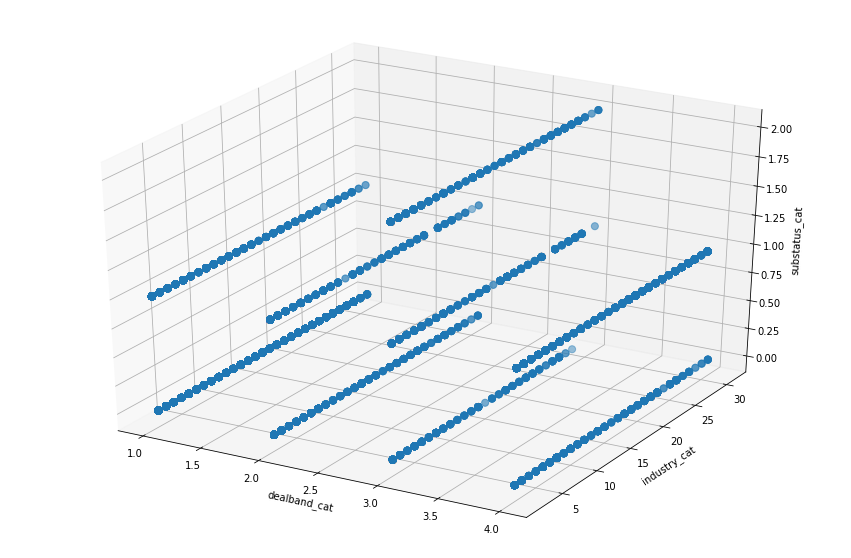

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.dealband_cat, df.industry_cat, df.substatus_cat, s=50)

ax.set_xlabel('dealband_cat')
ax.set_ylabel('industry_cat')
ax.set_zlabel('substatus_cat')

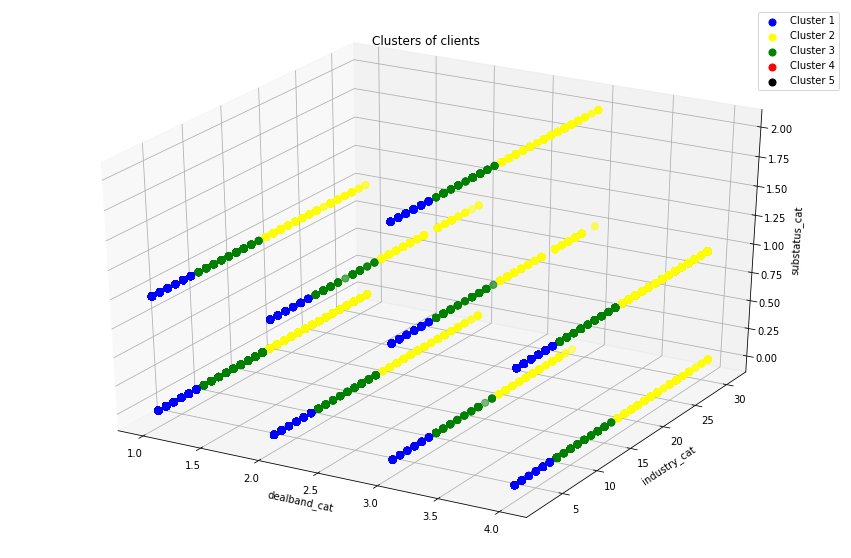

In [14]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red', 'black']

for i in range(0,5):
    dx.scatter(df[df.clusters == i].dealband_cat, 
               df[df.clusters == i].industry_cat, 
               df[df.clusters == i].substatus_cat, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('dealband_cat')
dx.set_ylabel('industry_cat')
dx.set_zlabel('substatus_cat')
dx.legend()

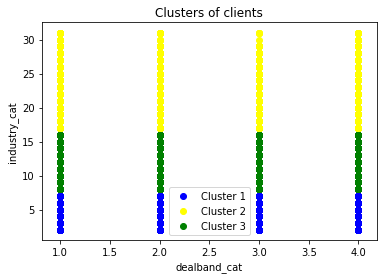

In [15]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]


plt.scatter(c1.dealband_cat, c1.industry_cat, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.dealband_cat, c2.industry_cat, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.dealband_cat, c3.industry_cat, c = 'green', label = 'Cluster 3')


plt.title('Clusters of clients')
plt.xlabel('dealband_cat')
plt.ylabel('industry_cat')
plt.legend()

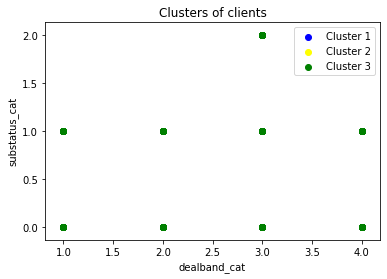

In [16]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]


plt.scatter(c1.dealband_cat, c1.substatus_cat, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.dealband_cat, c2.substatus_cat, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.dealband_cat, c3.substatus_cat, c = 'green', label = 'Cluster 3')


plt.title('Clusters of clients')
plt.xlabel('dealband_cat')
plt.ylabel('substatus_cat')
plt.legend()

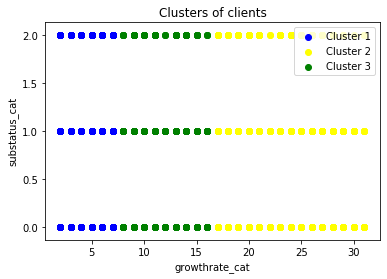

In [17]:
c1 = df[df.clusters == 0]
c2 = df[df.clusters == 1]
c3 = df[df.clusters == 2]


plt.scatter(c1.industry_cat, c1.substatus_cat, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.industry_cat, c2.substatus_cat, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.industry_cat, c3.substatus_cat, c = 'green', label = 'Cluster 3')


plt.title('Clusters of clients')
plt.xlabel('growthrate_cat')
plt.ylabel('substatus_cat')
plt.legend()